plotting_utils.py

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def plot2d(h, xbins, ybins, ax=None, **plot_kwargs):
    '''
    Plots already binned data in a histogram
    Provide explicit axes to choose where to plot it, otherwise the current axes will be used'''
    if ax==None:
        ax = plt.gca() # get current axes
    
    ax.matshow(h.transpose(), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower', **plot_kwargs)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    return ax

def plot1d(h, bins, ax=None, **plot_kwargs):
    '''
    Plots already binned data in a histogram
    Provide explicit axes to choose where to plot it, otherwise the current axes will be used'''
    if ax==None:
        ax = plt.gca() # get current axes
    # creating a list of the bin centers
    binw = bins[1]-bins[0] # assuming equal spaced bins
    binc = [ b + binw/2 for b in bins[:-1]]

    ax.bar(binc, h, width=binw, **plot_kwargs)
    return ax

def get_bin_centres(bins_edges, dtype='list'):
    binw = bins_edges[1]-bins_edges[0] # assuming equal spaced bins
    binc = [ b + binw/2 for b in bins_edges[:-1]]
    if dtype == 'ndarray':
        binc = np.array(binc)

    return binc

def get_bin_index(value, bins_edges):
    for index, edge in enumerate(bins_edges):
        if value > edge and value < bins_edges[index + 1]:
            return index

configuration.py

In [2]:
#change these folders depending on where you want to save data and plots
DATA_FOLDER = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/photosensor-calibration/data/"
PLOTS_FOLDER = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/photosensor-calibration/plots/"
RESULTS_FOLDER = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/photosensor-calibration/results/"

LOC_DATA_SIPM = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/"
LOC_DATA_PMT = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/Data_PMT/"

read_data.py

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys 
#sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/todor_fresh/photosensor-calibration/utils/")
#from plotting_utils import plot2d
import matplotlib.colors
import matplotlib.cm as colormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from configuration import PLOTS_FOLDER



def generate_counter_string(iterator):
    """Generate the counter string in every filename from an integer. (e.g. 00023 from 23)

    Parameters
    ----------
    iterator : int
        the file count 

    Returns
    -------
    string
        The file name ending
    """
    appendix = ""
    if iterator < 10:
        appendix = "0000{}".format(iterator)
    elif iterator < 100:
        appendix = "000{}".format(iterator)
    elif iterator < 1000:
        appendix = "00{}".format(iterator)
    elif iterator < 10000:
        appendix = "0{}".format(iterator)
    else:
        print("Illegal filename exception")
        appendix = "00000"  

    return appendix  



def read_large_file(filename, loc="/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"):
    """Read a single large file

    Parameters
    ----------
    filename : str
        filename
    loc : str, optional
        filepath, by default "/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"

    Returns
    -------
    _type_
        _description_
    """
    all_waveforms = []
    raw_data = np.genfromtxt(loc + filename, skip_header=0, delimiter=',')
    new_waveform = np.array([[-1, -1]])
    for index, entry in enumerate(raw_data):
            #print(entry)
        if entry[0] < raw_data[index - 1, 0]:
            if index == 0:
                new_waveform = np.append(new_waveform, [entry], axis=0)
                continue
            new_waveform = np.delete(new_waveform, 0, axis=0)
            all_waveforms.append(new_waveform)
                #new_waveform = [entry]
            new_waveform = np.array([[-1, -1], entry])
                #print("saving...")
        else:
                

            new_waveform = np.append(new_waveform, [entry], axis=0)
                #new_waveform.append(entry)
            if index == len(raw_data) - 1:
                    #print(new_waveform)
                new_waveform = np.delete(new_waveform, 0, axis=0)
                all_waveforms.append(new_waveform)
                    #new_waveform = []
                new_waveform = np.array([[-1, -1]])    
    
    return all_waveforms



def iterate_large_files(start, stop, filename, segment_no=1000, loc="/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"):
    """Iterate over all files and split all the segments into a single list

    Parameters
    ----------
    start : int
        filename count start
    stop : int
        filename count stop
    filename : string
        the filename to look for
    segment_no : int, optional
        the number of segments in each file, by default 1000
    loc : str, optional
        the location of the file, by default "/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/"

    Returns
    -------
    list<numpy.array>
        a list with each entry being an numpy array containing the time in the 0th column and the amplitude in the 1st column
    """

    header = 4 + segment_no
    all_waveforms = []
    print("Reading files...")
    for iterator in tqdm(range(start, stop)):
        file = loc + filename + generate_counter_string(iterator) + ".txt"
        raw_data = np.genfromtxt(file, skip_header=header, delimiter=',')
        #new_waveform = []
        new_waveform = np.array([[-1, -1]])
        for index, entry in enumerate(raw_data):
            #print(entry)
            if entry[0] < raw_data[index - 1, 0]:
                if index == 0:
                    new_waveform = np.append(new_waveform, [entry], axis=0)
                    continue
                new_waveform = np.delete(new_waveform, 0, axis=0)
                all_waveforms.append(new_waveform)
                #new_waveform = [entry]
                new_waveform = np.array([[-1, -1], entry])
                #print("saving...")
            else:
                

                new_waveform = np.append(new_waveform, [entry], axis=0)
                #new_waveform.append(entry)
                if index == len(raw_data) - 1:
                    #print(new_waveform)
                    new_waveform = np.delete(new_waveform, 0, axis=0)
                    all_waveforms.append(new_waveform)
                    #new_waveform = []
                    new_waveform = np.array([[-1, -1]])
        
        #print(all_waveforms)

    return all_waveforms

def make_heatmap(all_waveforms, save=False, savename="initial_data_reading_10x1000waveforms_heatmap.png", plot_title=False, title="Recorded waveforms for a single SiPM at 56V bias"):
    """Make a heatmap of the waveforms (faster than plotting all waveforms)

    Parameters
    ----------
    all_waveforms : list<numpy.array>
        a list of numpy arrays with each array being 1 waveform with timepoints in the 0th column and amplitudes in the 1st column
    save : bool, optional
        save the figure or not, by default False
    savename : str, optional
        name of the file to save, by default "initial_data_reading_10x1000waveforms_heatmap.png"
    """
    time = []
    amplitude = []
    print("Making a heatmap...")
    for index, waveform in tqdm(enumerate(all_waveforms)):
        for index_inner, single_point in enumerate(waveform):
            time.append(single_point[0])
            amplitude.append(single_point[1])

    time = np.array(time)
    time *= 10**9
    amplitude = np.array(amplitude)
    amplitude *= 10**3
        
    
    
    image, x_edges, y_edges = np.histogram2d(time, amplitude, bins=[400, 300])
    image = np.where(image == 0, np.full(np.shape(image), np.nan), image)
    
    fig = plt.figure(figsize=(12, 9))
    axes = fig.add_subplot()

    ax = plot2d(image, x_edges, y_edges, axes, norm=matplotlib.colors.LogNorm())
    im = axes.imshow(np.log10(image.T), aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
                     origin='lower', cmap='viridis')
    axes.set_xlabel('time[ns]', fontsize=22)
    axes.set_ylabel("Amplified signal[mV]", fontsize=22)
    axes.tick_params(axis='both', which='major', labelsize=18)
    axes.tick_params(axis='both', which='minor', labelsize=18)
    divider = make_axes_locatable(axes)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.set_label("Observed Frequency", fontsize=22)
    cax.tick_params(axis='both', which='both', labelsize=18)
    fig.tight_layout()
    
    
    if plot_title == True:
        axes.set_title(title, fontsize=22)

    if save == True:
        loc = PLOTS_FOLDER
        fig.savefig(loc + savename, dpi=600)

    plt.show()


    
# if __name__ == "__main__":
#     all_waveforms = iterate_large_files(0, 25, "C1--850V_pmt-0047_1000--", loc="C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/Data_PMT/Data_PMT/0047/850V/")

#     make_heatmap(all_waveforms, False, "pmt-0047_850V_25000waveforms.png", False)

compute_area.py

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
#import read_data as reader
from scipy.stats import crystalball
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import sys
#change this folder so the import is correct
#sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/todor_fresh/photosensor-calibration/utils/")
# from plotting_utils import plot1d
# from plotting_utils import get_bin_centres
# from plotting_utils import get_bin_index
# from read_data import make_heatmap
from scipy.stats import norm
from scipy.stats import moyal
from landaupy import landau
from landaupy import langauss
from copy import deepcopy
from iminuit import Minuit
from iminuit import cost
import iminuit
from scipy import odr

# from configuration import DATA_FOLDER
# from configuration import PLOTS_FOLDER
# from configuration import RESULTS_FOLDER
# from configuration import LOC_DATA_SIPM
# from configuration import LOC_DATA_PMT


def mirror_crystalball(x, beta, m, loc, scale, norm, offset):
    result = crystalball.pdf(-x, beta, m, -loc, scale) * norm + offset
    return result


def linear(x, a, b):
    return a * x + b


def norm_gaus(x, loc, sigma, normalisation):
    return norm.pdf(x, loc, sigma) * normalisation





def chi2(data, model, unc, no_params=21):
    """A function to calculate the chi^2.  Can be replaced with Minuit.cost.LeastSquares

    Parameters
    ----------
    data : list
        experimental data
    model : list
        theoretical values
    unc : list
        errors in the theoretical values
    no_params : int, optional
        number of parameters for reduced chi^2 calculation, by default 21

    Returns
    -------
    float
        chi^2
    """
    chi2 = np.sum((data - model)**2 / unc**2)
    chi2_per_DoF = chi2 / (len(data) - no_params)
    print("Chi2 : {0} and chi2 per DoF : {1}".format(chi2, chi2_per_DoF))
    return chi2




def determine_roi(all_waveforms, plot=False):
    """Determine the Region of Interest (ROI).  Locate the common peak in all waveforms 
    and the beginning of integration region.  An end value for the ROI is provided but is later 
    discarded.

    Parameters
    ----------
    all_waveforms : list of 2d np arrays
        list with each entry being a 2d np array describing a waveform with columns (time, amplitude)
    plot : bool, optional
        plot the determined roi or not, by default False

    Returns
    -------
    int, int, int
        indices of begin of ROI, end of ROI, location of peak
    """
    time = []
    amplitude = []
    bins = len(all_waveforms[0])
    
    print("Determining ROI...")
    for index, waveform in tqdm(enumerate(all_waveforms)):
        for index_inner, single_point in enumerate(waveform):
            time.append(single_point[0])
            amplitude.append(single_point[1])
    
    smallest = np.min(amplitude)
    amplitude = amplitude + np.abs(smallest)

    time = np.array(time)
    time *= 10**9

    hist, edges = np.histogram(time, bins, weights=amplitude)
    plot1d(hist, edges, alpha= 0.2, label='raw signal')
    hist_filtered = savgol_filter(hist, 60, 9)
    hist_deriv = savgol_filter(hist, 60, 9, 1, edges[1] - edges[0])
    visual_extrema = np.where(np.abs(hist_deriv) <= np.max(hist_deriv)/30, hist_filtered, np.full(np.shape(hist), np.nan))
    plot1d(hist_filtered, edges, alpha = 0.2, color='r', label='smoothed signal')
    #plt.scatter(get_bin_centres(edges), visual_extrema,  color='r')
    
    numerical_extrema = np.where(np.isnan(visual_extrema) , np.zeros(np.shape(visual_extrema)), visual_extrema)
    
    max_loc = np.argmax(numerical_extrema)
    plt.scatter(get_bin_centres(edges)[max_loc], visual_extrema[max_loc], color='r')
    #print(visual_extrema[max_loc])

    #define some dummy variables to find the peak before 
    iterator = max_loc
    activate = False
    roi_begin = 0

    while iterator >= 0:

        if(numerical_extrema[iterator] == 0):
            activate = True
        
        else:
            if activate == True:
                roi_begin = iterator
                break


        iterator -= 1


    plt.scatter(get_bin_centres(edges)[roi_begin], visual_extrema[roi_begin], color='r')

    #For the upper ROI limit just take 3 times the 
    diff = max_loc - roi_begin
    roi_end = max_loc + 1 * diff
    

    #plt.scatter(get_bin_centres(edges)[roi_end], hist_filtered[roi_end], color='r')
    plt.xlabel("time[ns]", fontsize = 18)
    plt.ylabel("Summed signal[V]", fontsize = 18)
    #plt.title("ROI determination")
    plt.legend(fontsize=18)
    plt.tick_params(axis='both', labelsize=16)
    plt.tight_layout()
    

    if plot==True:
        #plt.savefig("PLOTS_FOLDER + ROI_example_sipm.png", dpi=600)
        plt.show()
    plt.cla()
    print("ROI determined to be [{0}:{1}]".format(roi_begin, roi_end))

    return roi_begin, roi_end, max_loc


def filter_outliers(all_waveforms, max_loc, roi=[], plot=False):
    """Filters waveforms that peak away from the predetermined peak

    Parameters
    ----------
    all_waveforms : list of ndarray
        a list containing all waveforms, each waveform is an ndarray with first column time[s]
        and second column amplitude[V]
    max_loc : int
        index of the peak in every waveform
    roi : list, optional
        begin and end indices of the roi, by default []
    plot : bool, optional
        plot the waveforms or not, by default False

    Returns
    -------
    list of ndarray
        list of filtered waveforms
    """    
    filtered_waveforms = []
    double_filtered_waveforms = []
    trash = []  #use for testing
    max_diff = 0
    all_baseline_vars = []
    all_diff = []
    trashed_var = 0
    print("Calculating average values...")
    for index, waveform in tqdm(enumerate(all_waveforms)):
        maximum_value_loc = np.argmax(waveform[:, 1])

        
        max_value = np.max(waveform[:, 1])
        min_value = np.min(waveform[:, 1])
        diff = max_value - min_value
        all_diff.append(diff)
        if diff > max_diff:
            max_diff = diff
        
        """
        if diff < max_diff / 10:
            filtered_waveforms.append(waveform)
            continue
        """
        baseline_var = np.var(waveform[:roi[0], 1])
        all_baseline_vars.append(baseline_var)


        """
        if(maximum_value_loc < roi[1] and maximum_value_loc > roi[0]):


            if np.abs(maximum_value_loc - max_loc) > (max_loc - roi[0])*0.7:
                trash.append(waveform)
                continue
            filtered_waveforms.append(waveform)
            continue
        trash.append(waveform)
        """

    average_diff = np.average(all_diff)
    average_baseline_var = np.average(all_baseline_vars)
    baseline_var_cut = np.quantile(all_baseline_vars, 1.00)
    #print(baseline_var_cut)
    
    print("Eliminating outliers...")
    for index1, waveform1 in tqdm(enumerate(all_waveforms)):
        maximum_value_loc = np.argmax(waveform1[:, 1])
        max_value = np.max(waveform1[:, 1])
        min_value = np.min(waveform1[:, 1])
        diff = max_value - min_value
        if diff < average_diff / 2:
            filtered_waveforms.append(waveform1)
            continue
        
        baseline_var = np.var(waveform1[:roi[0], 1])
        if baseline_var > baseline_var_cut:
            trash.append(waveform1)
            trashed_var += 1
            continue
        
        if(maximum_value_loc < roi[1] and maximum_value_loc > roi[0]):


            if np.abs(maximum_value_loc - max_loc) > (max_loc - roi[0])*0.7:
                trash.append(waveform1)
                continue
            filtered_waveforms.append(waveform1)
            continue
        trash.append(waveform1)

        



    if plot == True:
        #make_heatmap(filtered_waveforms)

        #make_heatmap(trash[10:12], True, "example_filtered.png")
        plot_indices = [10, 11]
        lim_max = np.max(np.vstack(filtered_waveforms)[:, 1])
        lim_min = np.min(np.vstack(filtered_waveforms)[:, 1])
        for index in plot_indices:
            plt.plot(trash[index][:, 0], trash[index][:, 1])
        plt.ylim(bottom=lim_min, top=lim_max)
        plt.show()
        #np.savetxt("/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/rejected_waveforms_example.csv", np.vstack(trash), delimiter=',')
    
    print("Total entries left after filtering: {}".format(len(filtered_waveforms)))
    
    return filtered_waveforms


def find_area(selected_waveforms, roi=[], no_bins=150, plot=False, save=False, save_loc=DATA_FOLDER, savename="areas_sipm-1_56V_sl.csv"):
    """
    Filters waveforms that have high slope in the baseline region (top and bottom 10%) 
    Calculates integration limits for all waveforms (non-flat ones)
    Shifts all waveforms to 0
    Integrates in the determined regions all waveforms (or up until the average of other regions)
    Saves all areas to a file

    Parameters
    ----------
    selected_waveforms : list of ndarray
        a list containing all waveforms after first filter, each waveform is an ndarray with first column time[s]
        and second column amplitude[V]
    roi : list, optional
        begin and end indices of roi(the end is discarded, only used as an initial estimation), by default []
    no_bins : int, optional
        number of bins in histogram, by default 150
    plot : bool, optional
        show plots of waveforms after filtering and shifting and areas histogram, by default False
    save : bool, optional
        save the areas to csv file or not, by default False
    save_loc : str, optional
        location of the saved csv, by default DATA_FOLDER
    savename : str, optional
        filename of the areas csv, by default "areas_sipm-1_56V_sl.csv"

    Returns
    -------
    list<float>, ndarray, ndarray
        list of all areas, histogrammed areas, bins of the histogram
    """    
    areas = []
    #all_amplitudes = np.array([])
    shifted_waveforms = []
    negative_waveforms = []
    negative_var = []
    slopes = []
    print("Calculating areas...")
    roi_upper_all = [roi[1]]

    for index_1, waveform_1 in enumerate(selected_waveforms):
        #looking for minimum
        baseline = np.average(waveform_1[:roi[0], 1])
        waveform_1[:, 1] -= baseline
        #if(- np.min(waveform_1[:, 1]) < np.max(waveform_1[:, 1] / 0.75)):
            #shifted_waveforms.append(waveform_1)
        
        popt, pcov = curve_fit(linear, waveform_1[:roi[0], 0], waveform_1[:roi[0], 1])
        slopes.append(popt[0])
        """
        below_zero = np.flatnonzero(waveform_1[:, 1] < 0)
        if len(below_zero) < len(waveform_1[:, 1]) /2:

            shifted_waveforms.append(waveform_1)
        else:
            negative_waveforms.append(waveform_1)
            negative_var.append(np.var(waveform_1[:, 1]))
        """
        roi_effective = list(roi)
        peak_loc = np.argmax(waveform_1[:, 1])
        
        
        tail_indices = np.flatnonzero(waveform_1[peak_loc:, 1] <= np.max(waveform_1[:, 1]) * 0.1)
        if(tail_indices.size == 0):
            tail_indices = [0]
        tail_indices += peak_loc
        if tail_indices[0] > roi_effective[1]:
            
            roi_effective[1] = deepcopy( tail_indices[0])
            roi_upper_all.append(roi_effective[1])

        #all_amplitudes = np.append(all_amplitudes, waveform_1[:, 1])
    #var_cut = np.quantile(negative_var, 0.65)
    slope_cut_max = np.quantile(slopes, 0.9)
    slope_cut_min = np.quantile(slopes, 0.1)
    for index_2, waveform_2 in enumerate(selected_waveforms):
        if(slopes[index_2] <= slope_cut_max and slopes[index_2] >= slope_cut_min):
            shifted_waveforms.append(waveform_2)
        else:
            negative_waveforms.append(waveform_2)

    if plot == True:
        make_heatmap(shifted_waveforms, True, "shifted_waveforms_sipm-411_56V.png", False, "Waveforms after filtering for a single PMT at 850V")
        
    #shift = - np.min(all_amplitudes)
    
    #negative_waveforms = []
    
    for index, waveform in tqdm(enumerate(shifted_waveforms)):
        #waveform[:, 1] = waveform[:, 1] + shift #shift to above 0 before integration

        roi_effective = list(roi)
        peak_loc = np.argmax(waveform[:, 1])
        tail_indices = np.flatnonzero(waveform[peak_loc:, 1] <= np.max(waveform[:, 1]) * 0.1)
        if(tail_indices.size == 0):
            tail_indices = [0]
        tail_indices += peak_loc
        #print(tail_indices[0])
        if tail_indices[0] > roi_effective[1]:
            
            roi_effective[1] = deepcopy( tail_indices[0])
            
            
            #print(roi_effective)
        else:
            roi_effective[1] = int(np.average(roi_upper_all))
        
        integral = np.trapz(waveform[roi_effective[0]:roi_effective[1], 1], waveform[roi_effective[0]:roi_effective[1], 0], waveform[1, 0] - waveform[0, 0])
        areas.append(integral)
        if integral < 7e-11 and integral > 3e-11:
            #negative_waveforms.append(waveform)
            continue

    print("New ROI upper limit changed from {0} to {1}".format(roi[1], np.average(roi_upper_all)))  #check which roi limit is better
    

    hist, bins = np.histogram(areas, no_bins)
    if plot == True:
        plot1d(hist, bins)
        plt.xlabel("Charge[nV.s]")
        plt.ylabel("Entries[0.3 counts/(nV.ms)]")
        plt.title("Charge for a single PMT")
        plt.savefig(PLOTS_FOLDER + "areas_example_sipm.png", dpi=600)
        plt.show()
        #make_heatmap(negative_waveforms, True, "cancelled_waveforms.png")
        #np.savetxt("/home/todor/University/MPhys project/MPhys_project/analyze-lecroy/data/cancelled_waveforms_example_2.csv", np.vstack(negative_waveforms), delimiter=',')
    
    if save == True:
        fname = save_loc + savename
        np.savetxt(fname, areas, delimiter=',')
        print("Areas saved to file at: " + fname)

    return areas, hist, bins




    

def procedure_areas_save(sipm_no=411, voltage="56V", Ch=None, sipm_str='1'):
    """Procedure to call the functions to read data, find ROI, filter waveforms,
    integrate and save all areas to file

    Parameters
    ----------
    sipm_no : int, optional
        The number of the sipm as written in the data file names, by default 411
    voltage : str, optional
        voltage as written in the data file names, by default "56V"
    Ch : _type_, optional
        channel prefix added by scope, by default None
    sipm_str : str, optional
        in the case 2 sipms were recorded at once this string is how the filename was recorded, by default '1'
    """
    fname = voltage + "_sipm-" + sipm_str + "_1000--"
    if Ch != None:
        fname = Ch + "--" + fname
    location = LOC_DATA_SIPM+ str(sipm_no) + "/" + voltage + "/"
    all_waveforms = reader.iterate_large_files(0, 25, fname, loc=location)
    roi_begin, roi_end, peak_loc =  determine_roi(all_waveforms, plot=False)
    roi = [roi_begin, roi_end]
    
    filtered_waveforms = filter_outliers(all_waveforms, peak_loc, roi, plot=False)
    areas, hist, bins = find_area(filtered_waveforms, roi, no_bins=300, save=True, plot=True, savename="areas_sipm-" + str(sipm_no) + "_" + voltage + ".csv")


def procedure_bkg():
    """Procedure to analyze and find the histogram of the background (datasets with no LED power)
    """
    all_waveforms = reader.iterate_large_files(0, 23, "C2--57V_sipm-412413_bkg_1000--", loc=LOC_DATA_SIPM + "413/bkg/")
    roi_begin, roi_end, peak_loc =  38, 381, 110
    roi = [roi_begin, roi_end]
    filtered_waveforms = filter_outliers(all_waveforms, peak_loc, roi, plot=False)
    areas, hist, bins = find_area(filtered_waveforms, roi, no_bins=600, save=True, plot=True, savename="areas_sipm-413_bkg_57V.csv")
    plot1d(hist, bins)
    plt.xlabel("Charge[V.s]")
    plt.ylabel("Entries[2.7 counts/(nV.ms)]")
    plt.title("Data readout with no LED")
    plt.show()



        
def find_all_areas(sipm_no=411, voltage=[54, 59], Ch=None, sipm_str='1'):
    """calls procedure_areas_save for all voltages of a single SiPM

    Parameters
    ----------
    sipm_no : int, optional
        SiPM number as written in all data files, by default 411
    voltage : list, optional
        lower and upper limit of voltages to iterate over, by default [54, 59]
    Ch : str, optional
        channel prefix sometimes added by scope in the data file name, by default None
    sipm_str : str, optional
        if 2 sipms are read at once they are saved under the same name.  THis replaces sipm_no, i.e. '412413', by default '1'
    """
    for V in range(voltage[0], voltage[1] + 1):
        
        V_string = str(V) + "V"
        print("saving data for " + V_string)
        procedure_areas_save(sipm_no=sipm_no, voltage=V_string, Ch=Ch, sipm_str=sipm_str)

def make_pretty_plots():
    """Make pretty plots for presentation.  No use for the actual analysis
    """
    all_waveforms = reader.iterate_large_files(0, 25, "56V_sipm-1_1000--", loc=LOC_DATA_SIPM + "411/56V/")
    roi1, roi2, max_loc = determine_roi(all_waveforms, True)
    
    filtered_waveforms = filter_outliers(all_waveforms, max_loc, [roi1, roi2], plot=True)
    
    find_area(filtered_waveforms, [roi1, roi2], 600, True)
    
    rejected_1 = reader.read_large_file("rejected_waveforms_example.csv")
    rejected_2 = reader.read_large_file("cancelled_waveforms_example_2.csv")
    # shift waveforms
    for index, entry in enumerate(rejected_1):
        displacement = np.average(entry[:roi1, 1])
        entry[:, 1] -= displacement
        rejected_1[index] = entry
    indices_1 = [51, 23]
    indices_2 = [123, 222]
    for index_1 in indices_1:
        plt.plot(rejected_1[index_1][:, 0], rejected_1[index_1][:, 1], color='r', label="first filter")
    for index_2 in indices_2:
        plt.plot(rejected_2[index_2][:, 0], rejected_2[index_2][:, 1], color='b', label="second filter")

    plt.xlabel("Time [s]")
    plt.ylabel("Amplified signal [V]")
    plt.title("Rejected waveform examples")
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "rejected_examples.png")
    plt.show()


def make_background_plot():
    data = np.genfromtxt(DATA_FOLDER + "areas_sipm-411_bkg_57V.csv", delimiter=',')
    data_range = np.max(data) - np.min(data)
    bin_size = 2.7e-12
    bins = int(data_range / bin_size)
    plt.hist(data * 10**9, bins)
    plt.xlabel("Charge [nV.s]", fontsize=15)
    plt.ylabel("Frequency [{0:3.1f} counts / (nV.ms)]".format(bin_size* 10**12), fontsize=15)
    plt.tick_params('both', labelsize=13)
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "background_sipm_411.png", dpi=600)
    plt.show()





def make_sipm_snr_plot():
    font = 18
    sipm_number = ["411", "412", "413", "414", "417", "418", "419"]
    colors = ["b", "r", "g", "c", "m", "y", "k"]
    symbols = ['.', 'x', 'o', "s", "D", "v", "^"]
    breakdown_voltage = [51.5, 51.2, 51.4, 51.4, 51.3, 51.3, 51.3]
    err_breakdown = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2]
    for index, sipm in enumerate(sipm_number):
        data = np.genfromtxt(RESULTS_FOLDER + "results_sipm-" + sipm + ".csv", delimiter=',', skip_header=1)
        plt.errorbar(data[:, 0] - breakdown_voltage[index], data[:, 3], data[:, 4], err_breakdown[index], fmt=symbols[index], capsize=2.5, label=sipm, color=colors[index], alpha=0.7)
    
    plt.legend(fontsize=font-5)
    plt.xlabel("Overvoltage [V]", fontsize=font)
    plt.ylabel("SNR", fontsize=font)
    plt.tick_params('both', labelsize=font-2)
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "all_snr_sipm.png", dpi=600)
    plt.show()


def simple_linear(x, a):
    return a * x

def make_sipm_gain_plot():
    font = 18
    sipm_number = ["411", "412", "413", "414", "417", "418", "419"]
    colors = ["b", "r", "g", "c", "m", "y", "k"]
    symbols = ['.', 'x', 'o', "s", "D", "v", "^"]

    breakdown_voltage = [51.5, 51.2, 51.4, 51.4, 51.3, 51.3, 51.3]
    err_breakdown = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2]
    for index, sipm in enumerate(sipm_number):
        data = np.genfromtxt(RESULTS_FOLDER + "results_sipm-" + sipm + ".csv", delimiter=',', skip_header=1)
        data[:, 1] /= 500 * 10**6
        data[:, 2] /= 500 * 10**6
        
        plt.errorbar(data[:, 0] - breakdown_voltage[index], data[:, 1], data[:, 2], err_breakdown[index], fmt=symbols[index], capsize=2.5, label=sipm, color=colors[index], alpha=0.7)
        lin_model = odr.Model(simple_linear)
        fit_data = odr.RealData(data[:, 0] - breakdown_voltage[index], data[:, 1], np.full(np.shape(data[:, 1]), err_breakdown[index]), data[:, 2])
        p0 = (data[1, 1] - data[0, 1]) / (data[1, 0] - data[0, 0])
        odr_object = odr.ODR(fit_data, lin_model, beta0=[p0])
        out = odr_object.run()
        y_fit = simple_linear(data[:, 0] - breakdown_voltage[index], out.beta)
        plt.plot(data[:, 0] - breakdown_voltage[index], y_fit, color = colors[index], alpha=0.3)
    
    plt.legend(fontsize = font-5)
    plt.xlabel("Overvoltage [V]", fontsize=font)
    #plt.rcParams['text.usetex'] = True
    plt.ylabel(r"Gain [$10^{6}$#e]", fontsize=font)
    plt.tick_params('both', labelsize=font-2)
    plt.tight_layout()
    plt.savefig(PLOTS_FOLDER + "all_gains_sipm.png", dpi=600)
    plt.show()






# if __name__ == "__main__":
#     #make_sipm_snr_plot()
#     roi = determine_roi(all_waveforms, plot = True)

read data and make heatmap:

Reading files...


100%|██████████| 25/25 [02:03<00:00,  4.94s/it]


Making a heatmap...


25000it [00:07, 3295.71it/s]


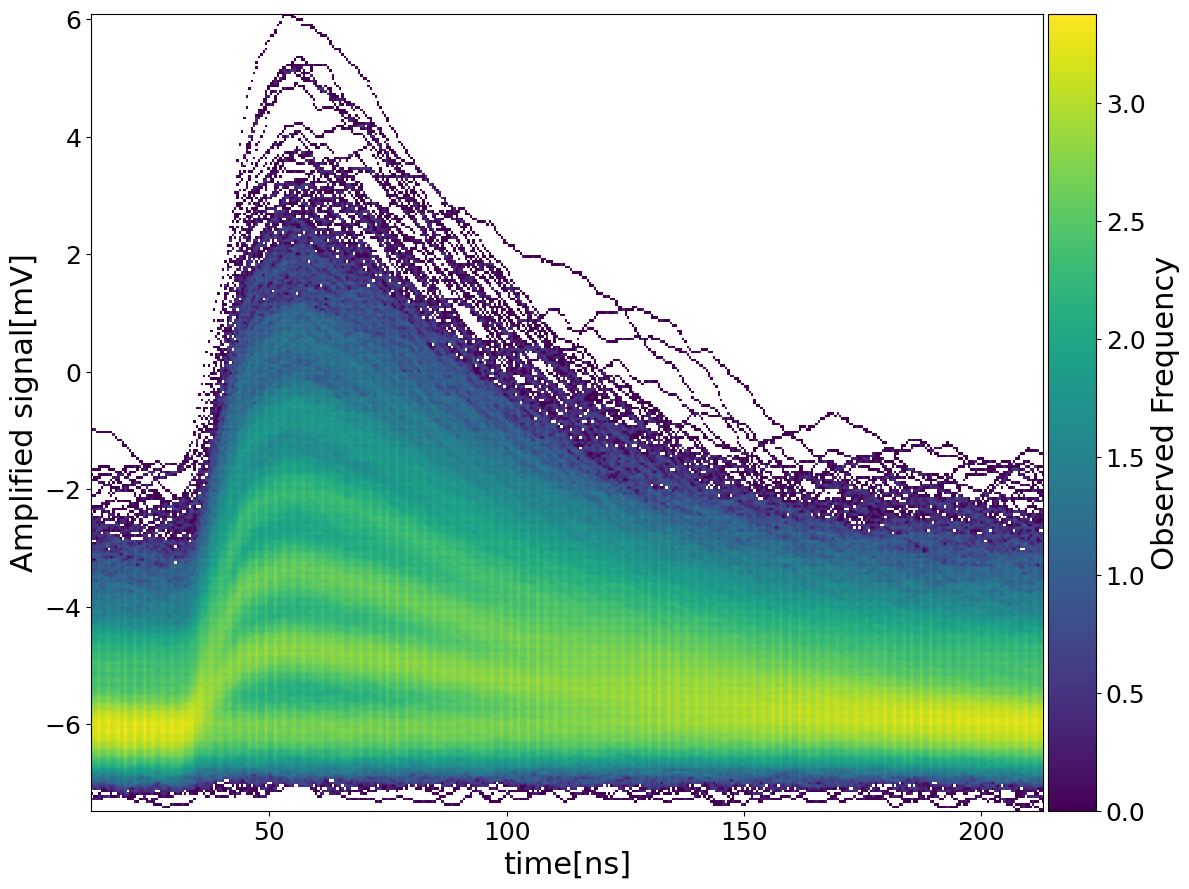

In [22]:
all_waveforms = iterate_large_files(0, 25, "55V_sipm-1_1000--", loc="C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/Data_SiPM/Data_SiPM/411/55V/")

make_heatmap(all_waveforms, False, "pmt-0047_850V_25000waveforms.png", False)

determining roi:

Determining ROI...


25000it [00:07, 3310.05it/s]


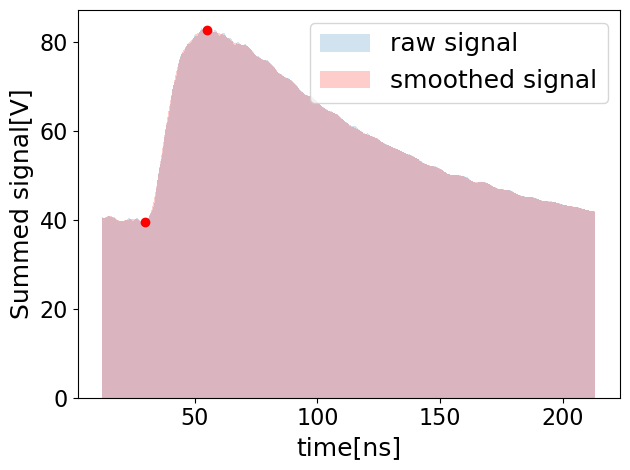

ROI determined to be [43:169]


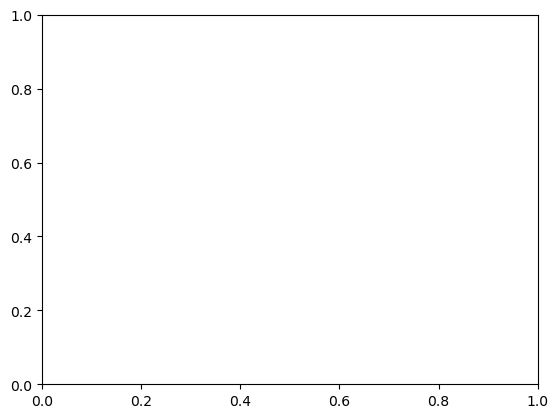

In [23]:
roi_begin, roi_end, max_loc = determine_roi(all_waveforms, True)

filtering outliers:

Calculating average values...


25000it [00:02, 10454.95it/s]


Eliminating outliers...


25000it [00:01, 13833.86it/s]


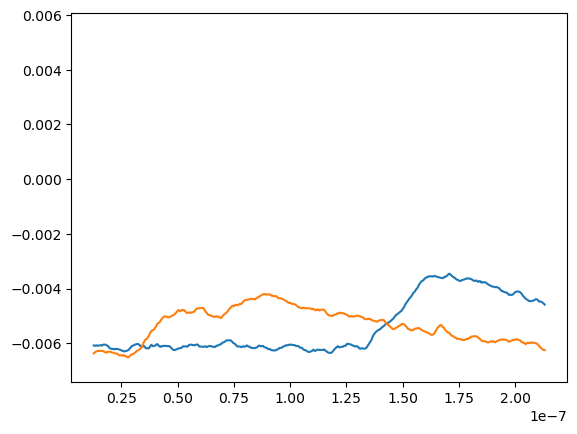

Total entries left after filtering: 19675


In [24]:
filtered_waveforms = filter_outliers(all_waveforms, max_loc, [roi_begin, roi_end], plot=True)

finding area:

Calculating areas...
Making a heatmap...


15739it [00:04, 3577.12it/s]


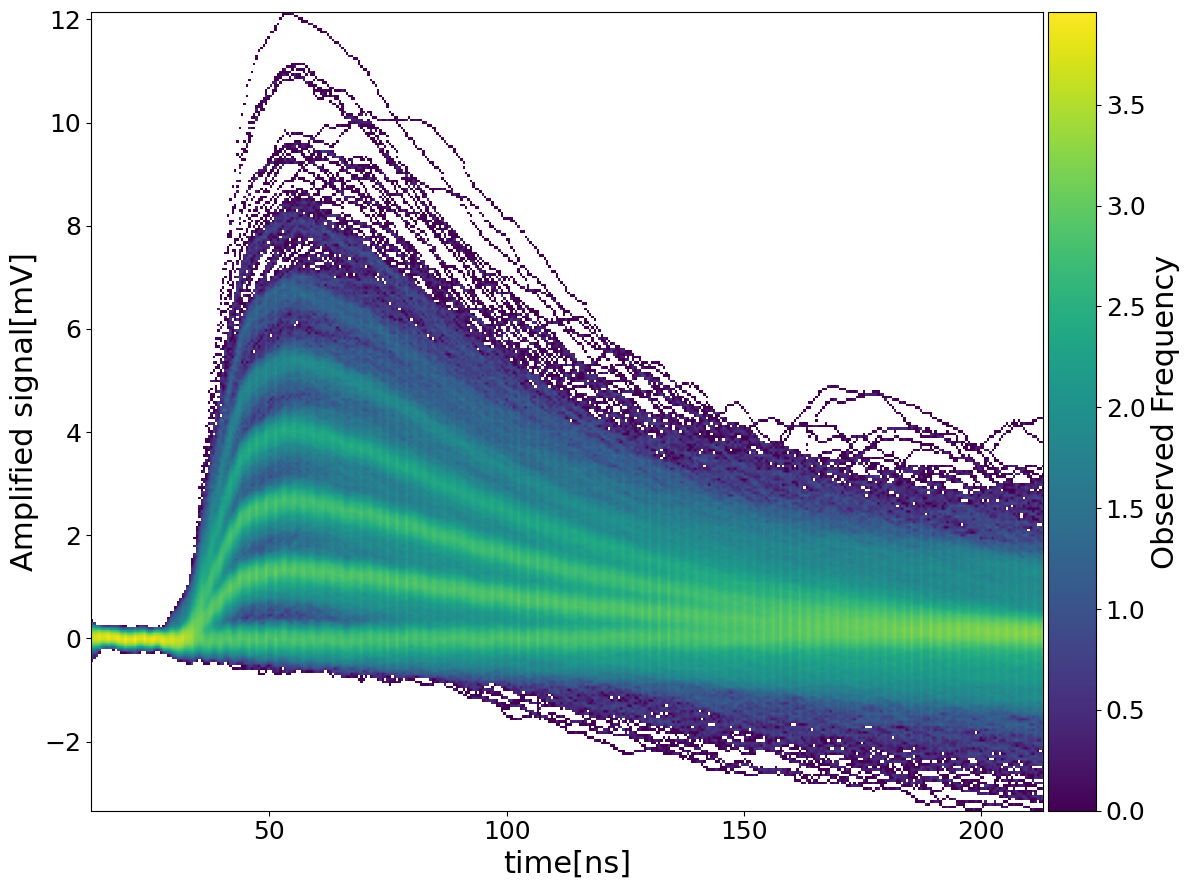

15739it [00:08, 1874.41it/s]


New ROI upper limit changed from 169 to 376.4193791157102


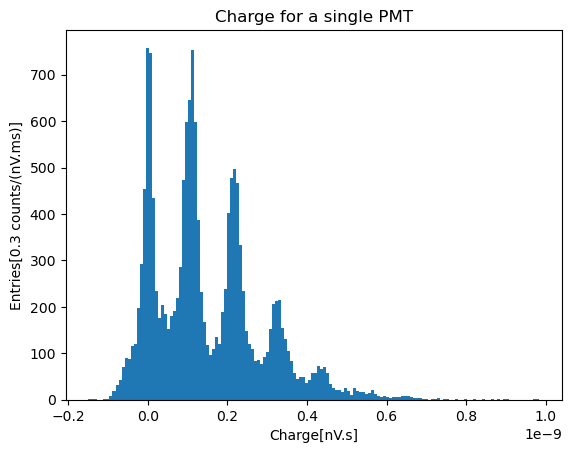

([7.375782681271654e-11,
  -3.102141773377056e-12,
  1.0495438355959695e-10,
  1.9668379364753128e-10,
  1.0203245262292326e-10,
  -6.698173035932781e-12,
  2.9378473760584366e-10,
  1.5634783984688055e-12,
  2.379544898525645e-10,
  1.1073233780611686e-10,
  -5.374762299540186e-11,
  4.0572085420215323e-10,
  -1.1657937882870382e-11,
  2.5134659082795467e-10,
  1.38475894249504e-10,
  2.3136041555683007e-10,
  3.2943303343400094e-10,
  -7.957710892070925e-12,
  2.4110868588409125e-10,
  1.688453651032991e-10,
  1.9847418385162174e-12,
  9.255731012061966e-11,
  -5.604362046325608e-12,
  1.1235548675493023e-10,
  1.0156887536844749e-10,
  -1.1308321641492754e-11,
  1.8029986477511974e-11,
  3.1636982896703286e-10,
  2.9661159177115985e-11,
  2.1114075385624135e-10,
  3.177105796439336e-10,
  3.1718460048871113e-10,
  1.0897189886884947e-11,
  4.423692014585083e-12,
  8.372517893301828e-12,
  1.1673356943568578e-10,
  4.0835340175327206e-10,
  3.5805201320449757e-10,
  1.682740569582321

In [25]:
find_area(filtered_waveforms, [roi_begin, roi_end], no_bins=150, plot=True, save=False, save_loc=DATA_FOLDER, savename="test.csv")